In [1]:
from dotenv import load_dotenv
import os

In [2]:
load_dotenv("../.env")

True

In [3]:
api_key = os.getenv("ALPHA_VANTAGE_API_KEY")

## Intraday Stock Market Data API

In [5]:
function = "TIME_SERIES_INTRADAY"
symbol = "MSFT"
interval = "5min"
datatype = "csv"
outputsize = "full"

In [6]:
from datetime import datetime

current_year = datetime.now().year

In [16]:
import requests

for i in [current_year - 2, current_year - 1, current_year]:
    for j in range(1, 13):
        period = f"{i}-{j:02d}"
        endpoint = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval={interval}&outputsize={outputsize}&apikey={api_key}&datatype={datatype}&month={period}"
        r = requests.get(url=endpoint)

        if not os.path.exists(f"../data/{i}/{j:02d}"):
            os.makedirs(f"../data/{i}/{j:02d}")
            
        with open(f"../data/{i}/{j:02d}/{symbol}_{interval}.csv", "w") as f:
            f.write(r.text)


## News & Sentiments API

In [11]:
import requests

function = "NEWS_SENTIMENT"
tickers = "MSFT"
time_from = "20230101T0400"
time_to = "20250115T1955"
limit=1000

endpoint = f"https://www.alphavantage.co/query?function={function}&tickers={tickers}&apikey={api_key}&time_from={time_from}&time_to={time_to}&limit={limit}"

r = requests.get(url=endpoint)

In [12]:
r.json()

{'items': '685',
 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish',
 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.',
 'feed': [{'title': 'Is Amazon the More Resilient Pick Over NVDA Stock in the AI Revolution?',
   'url': 'https://www.zacks.com/stock/news/2397737/is-amazon-the-more-resilient-pick-over-nvda-stock-in-the-ai-revolution',
   'time_published': '20250115T194500',
   'authors': ['Nilanjan Banerjee'],
   'summary': "Amazon's diversified business makes it a more stable pick than NVIDIA, which relies heavily on AI.",
   'banner_image': 'https://staticx-tuner.zacks.com/images/articles/main/f3/74235.jpg',
   'source': 'Zacks Commentary',
   'category_within_source': 'n/a',
   'source_domain': 'www.zacks.com',
   'topics': [{'topic': 'Retail & Wholesale', 'relevance_score': '0.333333'},
    {'topic': 'Financial Mar

In [13]:
if not os.path.exists(f"../data/news"):
    os.makedirs(f"../data/news")

with open(f"../data/news/{tickers}.json", "w") as f:
    f.write(r.text)

In [17]:
from datetime import datetime
import json

for feed in r.json()["feed"]:
    date = datetime.strptime(feed["time_published"], "%Y%m%dT%H%M%S")
    year = date.year
    month = date.month

    if not os.path.exists(f"../data/news/{year}/{month:02d}"):
        os.makedirs(f"../data/news/{year}/{month:02d}")

    with open(f"../data/news/{year}/{month:02d}/MSFT_news_{date.hour}-{date.minute}.json", "w") as f:
        f.write(json.dumps(feed, ensure_ascii=False, indent=4))

## Feature Engineering

In [62]:
import pandas as pd
import glob

In [63]:
csv_files = glob.glob("../data/*/*/MSFT_5min.csv")

In [64]:
csv_files

['../data/2025/01/MSFT_5min.csv',
 '../data/2024/03/MSFT_5min.csv',
 '../data/2024/04/MSFT_5min.csv',
 '../data/2024/05/MSFT_5min.csv',
 '../data/2024/02/MSFT_5min.csv',
 '../data/2024/11/MSFT_5min.csv',
 '../data/2024/10/MSFT_5min.csv',
 '../data/2024/07/MSFT_5min.csv',
 '../data/2024/09/MSFT_5min.csv',
 '../data/2024/08/MSFT_5min.csv',
 '../data/2024/01/MSFT_5min.csv',
 '../data/2024/06/MSFT_5min.csv',
 '../data/2024/12/MSFT_5min.csv',
 '../data/2023/03/MSFT_5min.csv',
 '../data/2023/04/MSFT_5min.csv',
 '../data/2023/05/MSFT_5min.csv',
 '../data/2023/02/MSFT_5min.csv',
 '../data/2023/11/MSFT_5min.csv',
 '../data/2023/10/MSFT_5min.csv',
 '../data/2023/07/MSFT_5min.csv',
 '../data/2023/09/MSFT_5min.csv',
 '../data/2023/08/MSFT_5min.csv',
 '../data/2023/01/MSFT_5min.csv',
 '../data/2023/06/MSFT_5min.csv',
 '../data/2023/12/MSFT_5min.csv']

In [65]:
df = pd.concat([pd.read_csv(file, parse_dates=["timestamp"]) for file in csv_files], ignore_index=True)
df = df.sort_values("timestamp")
df = df.reset_index(drop=True)

In [66]:
df.head()

,timestamp,open,high,low,close,volume
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737


In [67]:
df

,timestamp,open,high,low,close,volume
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737
...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500


In [68]:
df['sma_3'] = df['close'].rolling(window=3).mean()

In [69]:
df

,timestamp,open,high,low,close,volume,sma_3
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433
...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333


In [70]:
df['ema_3'] = df['close'].ewm(span=3, adjust=False).mean()

In [71]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019
...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678


In [72]:
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['rsi_14'] = calculate_rsi(df['close'], period= 14)

In [73]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN
...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484


In [74]:
df['price_change'] = df['close'].pct_change()

In [75]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN,NaN
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN,-0.001235
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN,0.001567
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN,0.001688
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN,-0.000370
...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351


In [76]:
df['volatility_3'] = df['close'].rolling(window=3).std()

In [77]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change,volatility_3
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN,NaN,NaN
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN,-0.001235,NaN
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN,0.001567,0.197064
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN,0.001688,0.388694
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN,-0.000370,0.212024
...,...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258,0.251462
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445,0.095394
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023,0.106927
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351,0.083865


In [78]:
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

In [79]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change,volatility_3,hour,day_of_week
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN,NaN,NaN,4,1
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN,-0.001235,NaN,4,1
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN,0.001567,0.197064,4,1
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN,0.001688,0.388694,4,1
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN,-0.000370,0.212024,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258,0.251462,19,2
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445,0.095394,19,2
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023,0.106927,19,2
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351,0.083865,19,2


In [80]:
for lag in range(1, 4):
    df[f'close_lag_{lag}'] = df['close'].shift(lag)

In [81]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change,volatility_3,hour,day_of_week,close_lag_1,close_lag_2,close_lag_3
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN,NaN,NaN,4,1,NaN,NaN,NaN
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN,-0.001235,NaN,4,1,238.8933,NaN,NaN
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN,0.001567,0.197064,4,1,238.5982,238.8933,NaN
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN,0.001688,0.388694,4,1,238.9720,238.5982,238.8933
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN,-0.000370,0.212024,4,1,239.3754,238.9720,238.5982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258,0.251462,19,2,427.0300,427.4000,427.2250
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445,0.095394,19,2,426.9200,427.0300,427.4000
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023,0.106927,19,2,427.1100,426.9200,427.0300
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351,0.083865,19,2,427.1000,427.1100,426.9200


In [82]:
df['trend'] = (df['close'].shift(-1) > df['close']).astype(int)

In [83]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change,volatility_3,hour,day_of_week,close_lag_1,close_lag_2,close_lag_3,trend
0,2023-01-03 04:00:00,237.1125,238.8933,237.1125,238.8933,532,NaN,238.893300,NaN,NaN,NaN,4,1,NaN,NaN,NaN,0
1,2023-01-03 04:05:00,238.8343,238.8343,238.5883,238.5982,1265,NaN,238.745750,NaN,-0.001235,NaN,4,1,238.8933,NaN,NaN,1
2,2023-01-03 04:10:00,238.5982,238.9720,238.1062,238.9720,7306,238.821167,238.858875,NaN,0.001567,0.197064,4,1,238.5982,238.8933,NaN,1
3,2023-01-03 04:15:00,238.8146,239.3754,238.8146,239.3754,730,238.981867,239.117138,NaN,0.001688,0.388694,4,1,238.9720,238.5982,238.8933,0
4,2023-01-03 04:20:00,238.9819,239.2869,238.9819,239.2869,737,239.211433,239.202019,NaN,-0.000370,0.212024,4,1,239.3754,238.9720,238.5982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258,0.251462,19,2,427.0300,427.4000,427.2250,1
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445,0.095394,19,2,426.9200,427.0300,427.4000,0
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023,0.106927,19,2,427.1100,426.9200,427.0300,1
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351,0.083865,19,2,427.1000,427.1100,426.9200,1


In [84]:
df.trend.value_counts()

trend
0    48820
1    47249
Name: count, dtype: int64

In [85]:
df = df.dropna()

In [86]:
df

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change,volatility_3,hour,day_of_week,close_lag_1,close_lag_2,close_lag_3,trend
13,2023-01-03 05:15:00,239.0212,239.0212,239.0212,239.0212,157,239.355767,239.264573,52.329605,-0.001644,0.309304,5,1,239.4148,239.6313,239.6214,0
14,2023-01-03 05:25:00,238.7457,238.7457,238.7457,238.7457,193,239.060567,239.005137,47.556777,-0.001153,0.336283,5,1,239.0212,239.4148,239.6313,1
15,2023-01-03 05:35:00,238.7359,238.8638,238.7359,238.8638,617,238.876900,238.934468,54.670136,0.000495,0.138216,5,1,238.7457,239.0212,239.4148,1
16,2023-01-03 05:40:00,238.9130,238.9130,238.9130,238.9130,100,238.840833,238.923734,48.828900,0.000206,0.085982,5,1,238.8638,238.7457,239.0212,1
17,2023-01-03 05:45:00,239.0409,239.0409,239.0409,239.0409,100,238.939233,238.982317,42.545130,0.000535,0.091418,5,1,238.9130,238.8638,238.7457,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96064,2025-01-15 19:35:00,427.0200,427.1000,426.7100,426.9200,807,427.116667,427.047421,51.338200,-0.000258,0.251462,19,2,427.0300,427.4000,427.2250,1
96065,2025-01-15 19:40:00,426.8650,427.2400,426.7012,427.1100,286,427.020000,427.078711,46.236559,0.000445,0.095394,19,2,426.9200,427.0300,427.4000,0
96066,2025-01-15 19:45:00,427.1000,427.2500,427.0000,427.1000,296,427.043333,427.089355,49.855072,-0.000023,0.106927,19,2,427.1100,426.9200,427.0300,1
96067,2025-01-15 19:50:00,427.1900,427.4800,427.0062,427.2500,500,427.153333,427.169678,45.597484,0.000351,0.083865,19,2,427.1000,427.1100,426.9200,1


## Data Exploration

<Axes: title={'center': 'MSFT Close Price'}, xlabel='Date', ylabel='Close Price'>

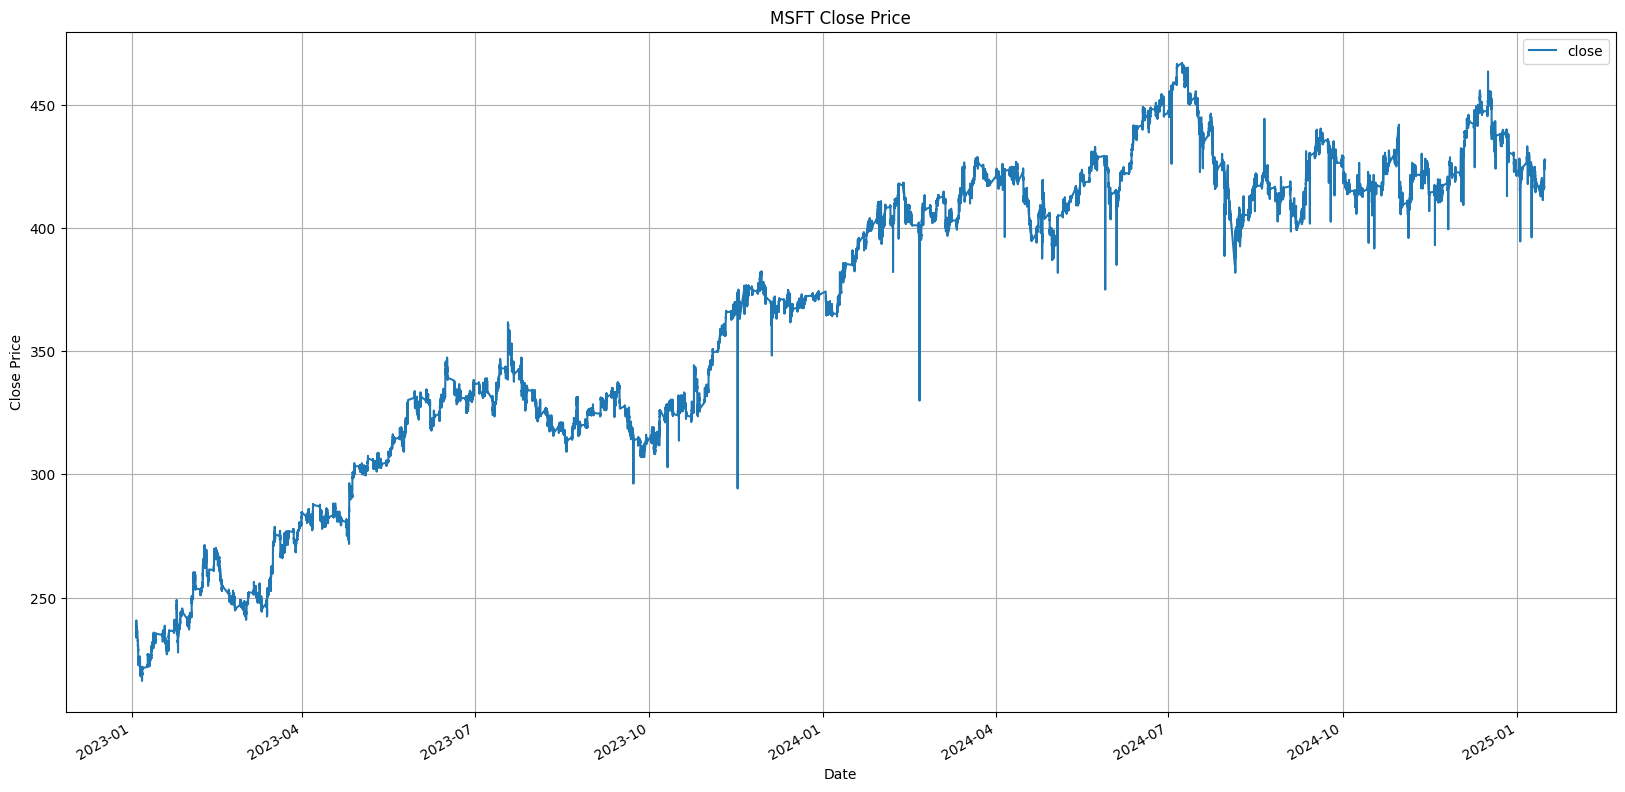

In [87]:
df.plot(x='timestamp', 
        y='close',
        xlabel='Date',
        ylabel='Close Price',
        title='MSFT Close Price',
        grid=True,
        kind='line',
        figsize=(20, 10))

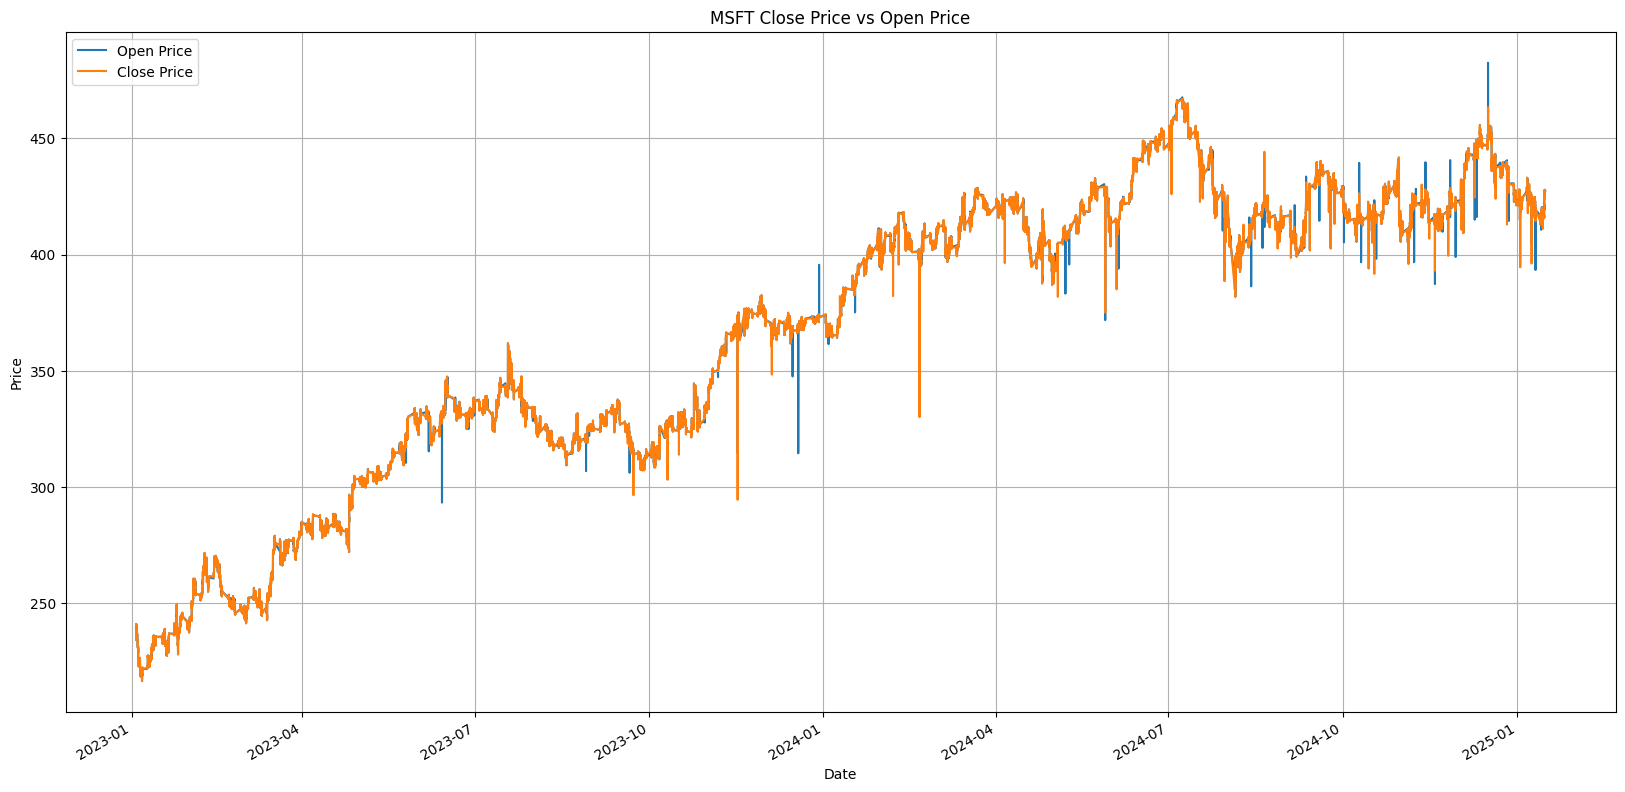

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
df.plot(x='timestamp',
        y=['open', 'close'],
        xlabel='Date',
        ylabel='Price',
        title='MSFT Close Price vs Open Price',
        grid=True,
        kind='line',
        figsize=(20, 10),
        ax=ax
    )
ax.legend(["Open Price", "Close Price"])

<Axes: title={'center': 'MSFT Volume'}, xlabel='Date', ylabel='Volume'>

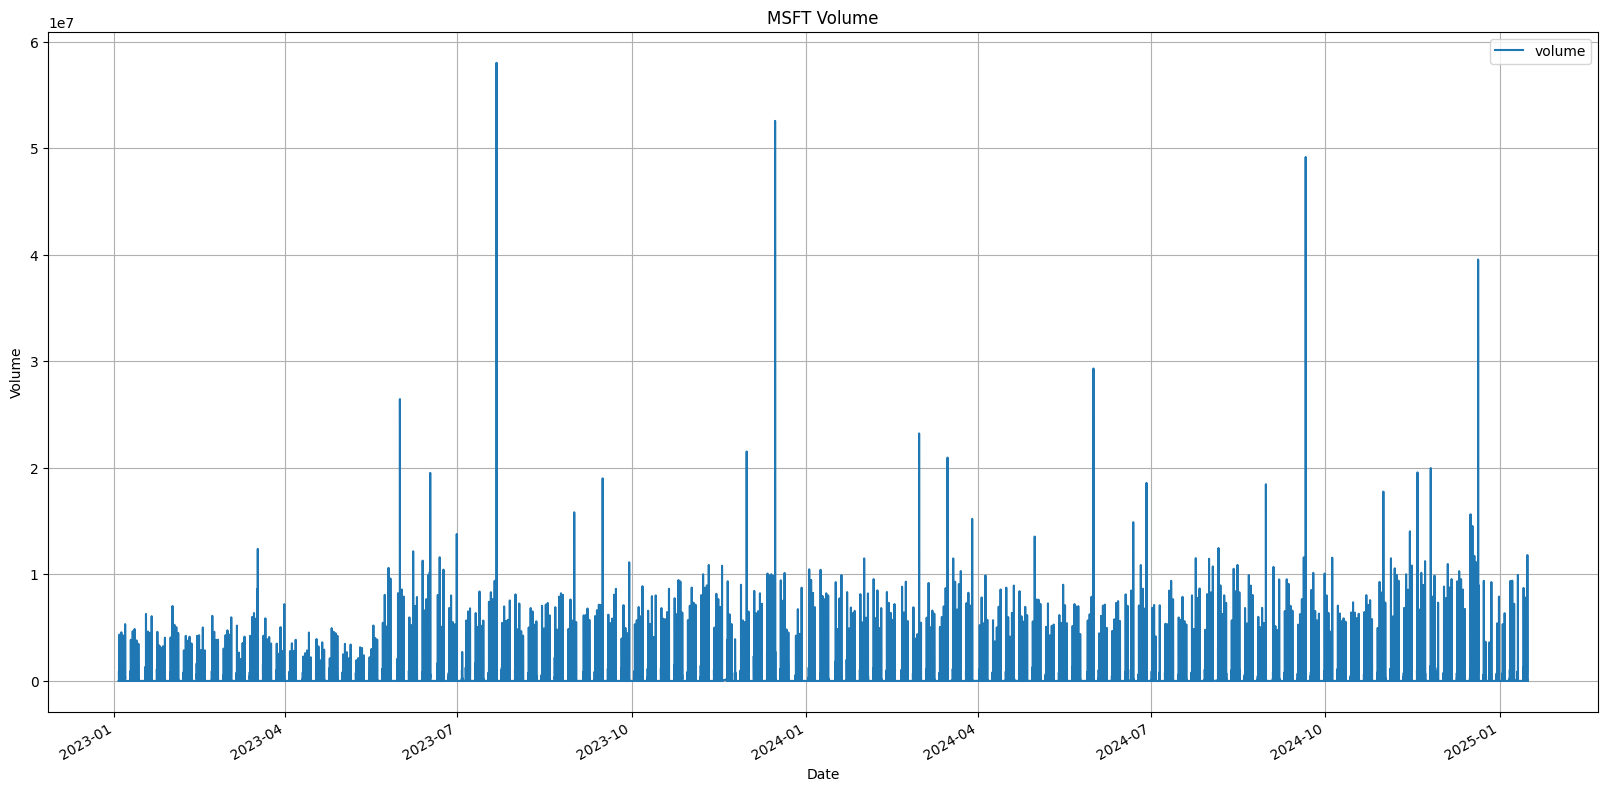

In [89]:
df.plot(x='timestamp',
        y='volume',
        xlabel='Date',
        ylabel='Volume',
        title='MSFT Volume',
        grid=True,
        kind='line',
        figsize=(20, 10)
    )

<Axes: title={'center': 'MSFT Volatility'}, xlabel='Date', ylabel='Volatility'>

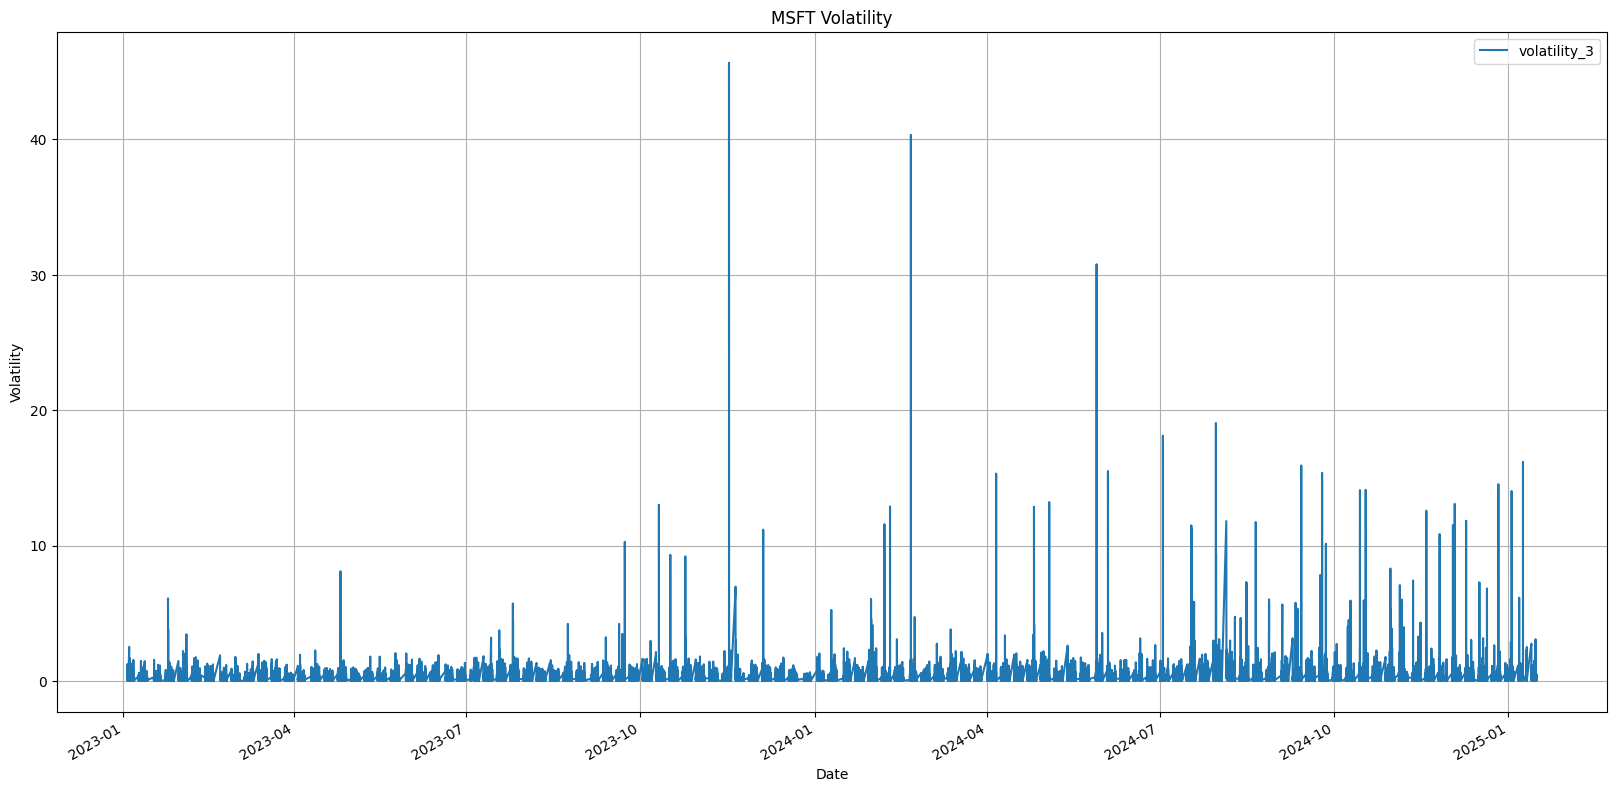

In [90]:
df.plot(x='timestamp',
        y='volatility_3',
        xlabel='Date',
        ylabel='Volatility',
        title='MSFT Volatility',
        grid=True,
        kind='line',
        figsize=(20, 10)
)

## Integrate News Data as Text Embeddings

In [91]:
# Step 1: Load and preprocess news data
import glob
import json
from datetime import datetime
import pandas as pd

news_file = "../data/news/MSFT.json"
news_data = []

with open(news_file, "r", encoding="ISO-8859-1") as f:
    news = json.load(f)
    for feed in news["feed"]:
        news_data.append({
            "timestamp": datetime.strptime(feed["time_published"], "%Y%m%dT%H%M%S"),
            "title": feed["title"],
            "summary": feed["summary"]    
        })   

news_df = pd.DataFrame(news_data)
news_df["text"] = news_df["title"] + " " + news_df["summary"]
news_df = news_df[["timestamp", "text"]]

# Step 2: Generate embeddings using a pre-trained model
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
news_df["embedding"] = news_df["text"].apply(lambda x: model.encode(x))

# Step 3: Align news embeddings with stock data
news_df["timestamp"] = news_df["timestamp"].dt.floor("5T")

# Merge stock data with news embeddings
merged_df = pd.merge_asof(df.sort_values("timestamp"),
                          news_df.sort_values("timestamp"),
                          on="timestamp",
                          direction="backward",
                          tolerance=pd.Timedelta("5T"))

merged_df = merged_df.dropna(subset=["embedding"])
# Drop unnecessary columns
merged_df = merged_df.drop(columns=["text"])
# Step 4: Prepare embeddings for model input
import numpy as np

# Convert embeddings to a numpy array
merged_df["embedding"] = merged_df["embedding"].apply(lambda x: np.array(x))
embedding_matrix = np.vstack(merged_df["embedding"].values)

/var/folders/zy/gr1xcr2s6l9_b9bs28qjdpb40000gp/T/ipykernel_56608/2280620302.py:30: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  news_df["timestamp"] = news_df["timestamp"].dt.floor("5T")
/var/folders/zy/gr1xcr2s6l9_b9bs28qjdpb40000gp/T/ipykernel_56608/2280620302.py:37: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  tolerance=pd.Timedelta("5T"))


In [92]:
merged_df.head()

,timestamp,open,high,low,close,volume,sma_3,ema_3,rsi_14,price_change,volatility_3,hour,day_of_week,close_lag_1,close_lag_2,close_lag_3,trend,embedding
93133,2024-12-20 13:25:00,440.2150,440.385,439.4800,439.560,183710,440.153300,440.058709,24.242424,-0.001499,0.562922,13,4,440.220,440.6799,440.9450,0,"[0.08427307, -0.019826729, 0.015805105, -0.017..."
93134,2024-12-20 13:30:00,439.5500,439.720,439.1501,439.360,206894,439.713333,439.709355,15.157293,-0.000455,0.450037,13,4,439.560,440.2200,440.6799,1,"[-0.04905166, -0.040289056, -0.03897904, 0.002..."
93135,2024-12-20 13:35:00,439.3950,440.000,439.2400,439.600,130800,439.506667,439.654677,13.592233,0.000546,0.128582,13,4,439.360,439.5600,440.2200,0,"[-0.04905166, -0.040289056, -0.03897904, 0.002..."
93136,2024-12-20 13:40:00,439.5650,439.740,439.2900,439.385,100054,439.448333,439.519839,15.748031,-0.000489,0.131941,13,4,439.600,439.3600,439.5600,0,"[-0.004983851, -0.07430853, -0.02190475, 0.030..."
93137,2024-12-20 13:45:00,439.3344,439.660,439.2000,439.240,84811,439.408333,439.379919,13.555556,-0.000330,0.181131,13,4,439.385,439.6000,439.3600,1,"[-0.004983851, -0.07430853, -0.02190475, 0.030..."


## Model Training

In [93]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [94]:
class TrendClassifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(TrendClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1) # Single output
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [109]:
X = df[['open', 'high', 'low', 'close', 'volume', 'sma_3', 'ema_3', 'rsi_14', 'price_change', 'volatility_3', 'hour', 'day_of_week', 'close_lag_1', 'close_lag_2', 'close_lag_3']].values
#X = merged_df[['open', 'high', 'low', 'close', 'volume', 'sma_3', 'ema_3', 'rsi_14', 'price_change', 'volatility_3', 'hour', 'day_of_week', 'close_lag_1', 'close_lag_2', 'close_lag_3']].values
#X = np.hstack([X, embedding_matrix])
y = df['trend'].values
#y = merged_df['trend'].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [110]:
len(X_train)

67239

In [111]:
len(X_val)

14408

In [112]:
len(X_test)

14409

In [113]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [114]:
device

'cpu'

In [115]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64)
test_loader = DataLoader(dataset=test_dataset, batch_size=64)

In [116]:
hidden_size_list = [8, 16, 32, 64]
lr_list = [0.0001, 0.0005, 0.01]
epochs_list = [10, 20, 30]

In [117]:
epoch = epochs_list[2]
lr = lr_list[1]
hidden_size = hidden_size_list[3]

model = TrendClassifier(input_size=X_train.shape[1], hidden_size=hidden_size).to(device)

In [118]:
optimizer = optim.SGD(model.parameters(), lr=lr)

for e in range(epoch):
    model.train()
    train_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = nn.BCEWithLogitsLoss()(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()


    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val = X_val.to(device)
            y_val = y_val.to(device)
            y_val_pred = model(X_val)
            val_loss += nn.BCEWithLogitsLoss()(y_val_pred, y_val.unsqueeze(1)).item()

    print(f"Epoch {e+1}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")

Epoch 1, Train Loss: 0.6972, Val Loss: 0.6969
Epoch 2, Train Loss: 0.6954, Val Loss: 0.6953
Epoch 3, Train Loss: 0.6944, Val Loss: 0.6944
Epoch 4, Train Loss: 0.6938, Val Loss: 0.6939
Epoch 5, Train Loss: 0.6935, Val Loss: 0.6935
Epoch 6, Train Loss: 0.6933, Val Loss: 0.6933
Epoch 7, Train Loss: 0.6932, Val Loss: 0.6932
Epoch 8, Train Loss: 0.6931, Val Loss: 0.6931
Epoch 9, Train Loss: 0.6931, Val Loss: 0.6930
Epoch 10, Train Loss: 0.6931, Val Loss: 0.6930
Epoch 11, Train Loss: 0.6931, Val Loss: 0.6930
Epoch 12, Train Loss: 0.6931, Val Loss: 0.6929
Epoch 13, Train Loss: 0.6931, Val Loss: 0.6929
Epoch 14, Train Loss: 0.6931, Val Loss: 0.6929
Epoch 15, Train Loss: 0.6931, Val Loss: 0.6929
Epoch 16, Train Loss: 0.6931, Val Loss: 0.6929
Epoch 17, Train Loss: 0.6931, Val Loss: 0.6929
Epoch 18, Train Loss: 0.6931, Val Loss: 0.6929
Epoch 19, Train Loss: 0.6931, Val Loss: 0.6929
Epoch 20, Train Loss: 0.6931, Val Loss: 0.6929
Epoch 21, Train Loss: 0.6931, Val Loss: 0.6929
Epoch 22, Train Loss: 